In [9]:
import pandas as pd
from sklearn.preprocessing import StandardScaler
df = pd.read_csv("../data/delaney-mordred.csv")
df = df.dropna()
y = df["logS"]
X = df.loc[:, df.columns.str.startswith("mordred_")]
sc = StandardScaler()
X_std = pd.DataFrame(sc.fit_transform(X))

In [10]:
corr_matrix = X_std.corr()
corr_matrix

,0,1,2,3,4,5,6,7,8,9,...,1603,1604,1605,1606,1607,1608,1609,1610,1611,1612
0,1.000000,0.987153,NaN,0.027231,0.995450,0.790200,0.787351,0.995450,0.519100,0.937780,...,0.811720,0.931613,0.916272,-0.030519,0.773519,0.966816,0.994722,0.981274,0.851222,0.973652
1,0.987153,1.000000,NaN,0.027670,0.978367,0.818223,0.814810,0.978367,0.489755,0.952800,...,0.838590,0.935688,0.928517,-0.018017,0.722467,0.957625,0.980533,0.966357,0.897492,0.970782
2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,0.027231,0.027670,NaN,1.000000,0.021414,0.017136,0.019265,0.021414,-0.022520,0.030225,...,0.023153,0.018395,0.018373,-0.007018,0.010182,0.017104,0.024324,0.020267,0.041318,0.025328
4,0.995450,0.978367,NaN,0.021414,1.000000,0.769420,0.767181,1.000000,0.559311,0.935030,...,0.794505,0.921531,0.904190,-0.056293,0.773277,0.955707,0.985994,0.970371,0.823045,0.981478
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1608,0.966816,0.957625,NaN,0.017104,0.955707,0.785015,0.780450,0.955707,0.480190,0.883968,...,0.780542,0.910706,0.891975,0.006372,0.729782,1.000000,0.983596,0.991220,0.842513,0.917544
1609,0.994722,0.980533,NaN,0.024324,0.985994,0.804683,0.798210,0.985994,0.518660,0.924554,...,0.812870,0.940126,0.909191,-0.011433,0.759909,0.983596,1.000000,0.995639,0.840396,0.950629
1610,0.981274,0.966357,NaN,0.020267,0.970371,0.809544,0.799646,0.970371,0.520287,0.905401,...,0.805852,0.939666,0.894744,0.002234,0.741031,0.991220,0.995639,1.000000,0.821597,0.924104
1611,0.851222,0.897492,NaN,0.041318,0.823045,0.637637,0.644623,0.823045,0.137290,0.786804,...,0.666149,0.759754,0.889910,0.056835,0.695991,0.842513,0.840396,0.821597,1.000000,0.870991


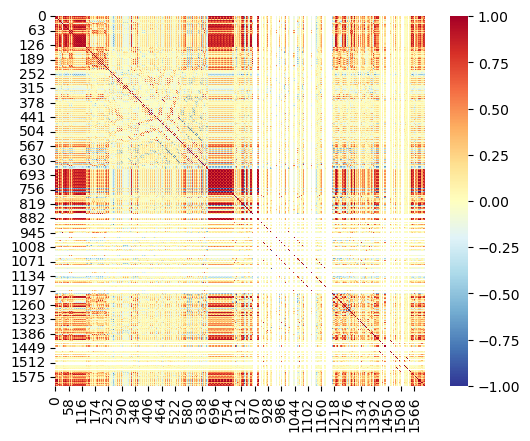

In [11]:
import matplotlib.pyplot as plt
import seaborn as sns
sns.heatmap(
    corr_matrix,
    cmap='RdYlBu_r',
    square=True,
    vmax=1,
    vmin=-1,
    center=0
)

plt.show()

In [45]:
X = X.loc[:, X.std() > 0.01]
X_slice = X.loc[:, X.std()/X.mean() > 1]
X_slice_std = pd.DataFrame(sc.fit_transform(X_slice))

In [67]:
import numpy as np
import warnings
warnings.filterwarnings("ignore", category=DeprecationWarning) 

def search_highly_correlated_variables(X: pd.DataFrame, thresh):
    corr = X.corr().abs()

    # 対角成分の値を0にする
    for i in range(corr.shape[0]):
        corr.iloc[i, i] = 0

    highly_correlated_variable_numbers = []

    for i in range(corr.shape[0]):
        r_max = corr.max() # 列方向の最大値を取る
        r_max_max = r_max.max() # 各列の最大値をとる→行列の中で一番大きい相関係数がわかる

        if r_max_max >= thresh:
            variable_number_1 = np.where(r_max == r_max_max)[0][0] # rmax_maxである一番小さいインデックスを取得
            variable_number_2 = np.where(corr.iloc[:, variable_number_1] == r_max_max)[0][0]
            r_sum_1 = corr.iloc[:, variable_number_1].sum()
            r_sum_2 = corr.iloc[:, variable_number_2].sum()
            if r_sum_1 >= r_sum_2:
                delete_x_number = variable_number_1
            else:
                delete_x_number = variable_number_2
            highly_correlated_variable_numbers.append(delete_x_number)
            corr.iloc[:, delete_x_number] = 0
            corr.iloc[delete_x_number, :] = 0
        else:
            break

    return highly_correlated_variable_numbers

In [70]:
to_drop = search_highly_correlated_variables(X_slice_std, thresh=0.9)

In [73]:
X_selected_by_corr = X_slice_std.drop(X_slice_std.columns[to_drop], axis=1)
X_selected_by_corr

,0,1,5,6,8,9,18,20,26,34,...,567,568,569,570,572,574,578,579,581,584
0,-0.077589,-0.019209,-0.084515,-0.113257,5.078824,-0.297740,3.383672,5.865630,2.979827,1.612986,...,-0.168104,1.826914,0.153811,4.734437,1.941771,2.456402,5.078178,0.625417,-0.471438,3.164047
1,-0.077589,-0.045569,-0.084515,-0.113257,0.232939,-0.297740,0.217451,-0.110583,-0.007347,-0.199543,...,-0.168104,-0.067166,-0.247038,0.208300,-0.218954,-0.132027,-0.286204,0.038121,1.802096,-0.074880
2,-0.077589,-0.051434,-0.084515,-0.113257,-0.305493,-0.297740,-0.349453,-0.280255,-0.163511,-0.534382,...,-0.168104,0.690466,1.115850,-0.503363,-0.705555,-0.370443,-0.286204,0.110419,-0.471438,-0.303142
3,-0.077589,-0.036687,-0.084515,-0.113257,-0.843925,-0.297740,0.772293,0.794332,0.351730,0.508355,...,-0.168104,-0.824798,-0.866532,-0.986004,0.965873,0.576453,0.092737,0.449818,-0.471438,0.620721
4,-0.077589,-0.054643,-0.084515,-0.113257,-0.843925,1.725456,-0.578627,-0.393369,-0.893602,-0.936356,...,-0.168104,-0.824798,-0.866532,-0.986004,-0.899656,-0.647313,-0.286204,-0.930681,1.802096,-0.518190
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1123,-0.077589,-0.054186,-0.084515,-0.113257,-0.843925,-0.297740,-0.578627,-0.393369,-0.893602,-0.937115,...,-0.168104,-0.824798,-0.866532,-0.986004,-0.899656,-0.647313,-0.286204,-0.930681,-0.471438,-0.485753
1124,-0.077589,-0.047941,-0.084515,-0.113257,0.771370,1.725456,0.221472,-0.374517,-0.083661,-0.049324,...,-0.168104,-0.445982,-0.485305,1.021466,-0.220302,0.183298,-0.286204,0.943300,-0.471438,-0.131345
1125,-0.077589,-0.046165,-0.084515,-0.113257,0.232939,5.771847,-0.414453,-0.374517,-0.424931,-0.062177,...,-0.168104,1.826914,2.287257,-0.464061,-0.608504,-0.232008,-0.286204,0.630969,-0.471438,-0.255087
1126,-0.077589,-0.054971,-0.084515,-0.113257,-0.843925,-0.297740,-0.578627,-0.393369,-0.786177,-0.894866,...,-0.168104,-0.445982,0.372456,-0.986004,-0.899656,-0.647313,-0.286204,-0.930681,-0.471438,-0.514586


In [81]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import Lasso
from sklearn.metrics import r2_score, mean_absolute_error

def train_and_eval(X, y):

    X_train, X_test, y_train, y_test = train_test_split(X, y)
    model = Lasso(alpha=0.1)
    model.fit(X_train, y_train)
    y_train_pred = model.predict(X_train)
    y_test_pred = model.predict(X_test)

    mae_train = mean_absolute_error(y_train, y_train_pred)
    mae_test = mean_absolute_error(y_test, y_test_pred)

    r2_train = r2_score(y_train, y_train_pred)
    r2_test = r2_score(y_test, y_test_pred)
    print(f"R2(train): {r2_train:.2f}, R2(test): {r2_test:.2f}")
    print(f"MAE(train): {mae_train:.2f}, MAE(test): {mae_test:.2f}")

    return y_train, y_train_pred, y_test, y_test_pred

In [83]:
y_train, y_train_pred, y_test, y_test_pred = train_and_eval(X_slice_std, y)
y_train, y_train_pred, y_test, y_test_pred = train_and_eval(X_selected_by_corr, y)

R2(train): 0.83, R2(test): 0.80
MAE(train): 0.66, MAE(test): 0.72
R2(train): 0.82, R2(test): 0.80
MAE(train): 0.67, MAE(test): 0.76


In [74]:
from sklearn.base import BaseEstimator, TransformerMixin
from sklearn.impute import SimpleImputer
from statsmodels.stats.outliers_influence import variance_inflation_factor
import numpy as np

class ReduceVIF(BaseEstimator, TransformerMixin):
    def __init__(self, thresh=5.0, impute=True, impute_strategy='median'):
        # From looking at documentation, values between 5 and 10 are "okay".
        # Above 10 is too high and so should be removed.
        self.thresh = thresh
        
        # The statsmodel function will fail with NaN values, as such we have to impute them.
        # By default we impute using the median value.
        # This imputation could be taken out and added as part of an sklearn Pipeline.
        if impute:
            self.imputer = SimpleImputer(strategy=impute_strategy)

    def fit(self, X, y=None):
        print('ReduceVIF fit')
        if hasattr(self, 'imputer'):
            self.imputer.fit(X)
        return self

    def transform(self, X, y=None):
        print('ReduceVIF transform')
        columns = X.columns.tolist()
        if hasattr(self, 'imputer'):
            X = pd.DataFrame(self.imputer.transform(X), columns=columns)
        return ReduceVIF.calculate_vif(X, self.thresh)

    @staticmethod
    def calculate_vif(X, thresh=5.0):
        # Taken from https://stats.stackexchange.com/a/253620/53565 and modified
        dropped=True
        while dropped:
            # Loop repeatedly until we find that all columns within our dataset
            # have a VIF value we're happy with.
            variables = X.columns
            dropped=False
            vif = []
            new_vif = 0
            for var in X.columns:
                new_vif = variance_inflation_factor(X[variables].values, X.columns.get_loc(var))
                vif.append(new_vif)
                if np.isinf(new_vif):
                    break
            max_vif = max(vif)
            if max_vif > thresh:
                maxloc = vif.index(max_vif)
                print(f'Dropping {X.columns[maxloc]} with vif={max_vif}')
                X = X.drop([X.columns.tolist()[maxloc]], axis=1)
                dropped=True
        return X

In [75]:
transformer = ReduceVIF()
X_vif = transformer.fit_transform(X_slice_std, y)
X.head()

ReduceVIF fit


ReduceVIF transform


/home/mori/miniforge3/envs/esol/lib/python3.9/site-packages/statsmodels/stats/outliers_influence.py:195: RuntimeWarning: divide by zero encountered in double_scalars
  vif = 1. / (1. - r_squared_i)


Dropping 3 with vif=inf


/home/mori/miniforge3/envs/esol/lib/python3.9/site-packages/statsmodels/stats/outliers_influence.py:195: RuntimeWarning: divide by zero encountered in double_scalars
  vif = 1. / (1. - r_squared_i)


Dropping 4 with vif=inf


/home/mori/miniforge3/envs/esol/lib/python3.9/site-packages/statsmodels/stats/outliers_influence.py:195: RuntimeWarning: divide by zero encountered in double_scalars
  vif = 1. / (1. - r_squared_i)


Dropping 7 with vif=inf


/home/mori/miniforge3/envs/esol/lib/python3.9/site-packages/statsmodels/stats/outliers_influence.py:195: RuntimeWarning: divide by zero encountered in double_scalars
  vif = 1. / (1. - r_squared_i)


Dropping 8 with vif=inf


/home/mori/miniforge3/envs/esol/lib/python3.9/site-packages/statsmodels/stats/outliers_influence.py:195: RuntimeWarning: divide by zero encountered in double_scalars
  vif = 1. / (1. - r_squared_i)


Dropping 9 with vif=inf


/home/mori/miniforge3/envs/esol/lib/python3.9/site-packages/statsmodels/stats/outliers_influence.py:195: RuntimeWarning: divide by zero encountered in double_scalars
  vif = 1. / (1. - r_squared_i)


Dropping 10 with vif=inf


/home/mori/miniforge3/envs/esol/lib/python3.9/site-packages/statsmodels/stats/outliers_influence.py:195: RuntimeWarning: divide by zero encountered in double_scalars
  vif = 1. / (1. - r_squared_i)


Dropping 11 with vif=inf


/home/mori/miniforge3/envs/esol/lib/python3.9/site-packages/statsmodels/stats/outliers_influence.py:195: RuntimeWarning: divide by zero encountered in double_scalars
  vif = 1. / (1. - r_squared_i)


Dropping 12 with vif=inf


/home/mori/miniforge3/envs/esol/lib/python3.9/site-packages/statsmodels/stats/outliers_influence.py:195: RuntimeWarning: divide by zero encountered in double_scalars
  vif = 1. / (1. - r_squared_i)


Dropping 13 with vif=inf


/home/mori/miniforge3/envs/esol/lib/python3.9/site-packages/statsmodels/stats/outliers_influence.py:195: RuntimeWarning: divide by zero encountered in double_scalars
  vif = 1. / (1. - r_squared_i)


Dropping 14 with vif=inf


/home/mori/miniforge3/envs/esol/lib/python3.9/site-packages/statsmodels/stats/outliers_influence.py:195: RuntimeWarning: divide by zero encountered in double_scalars
  vif = 1. / (1. - r_squared_i)


Dropping 15 with vif=inf


/home/mori/miniforge3/envs/esol/lib/python3.9/site-packages/statsmodels/stats/outliers_influence.py:195: RuntimeWarning: divide by zero encountered in double_scalars
  vif = 1. / (1. - r_squared_i)


Dropping 200 with vif=inf


/home/mori/miniforge3/envs/esol/lib/python3.9/site-packages/statsmodels/stats/outliers_influence.py:195: RuntimeWarning: divide by zero encountered in double_scalars
  vif = 1. / (1. - r_squared_i)


Dropping 206 with vif=inf


/home/mori/miniforge3/envs/esol/lib/python3.9/site-packages/statsmodels/stats/outliers_influence.py:195: RuntimeWarning: divide by zero encountered in double_scalars
  vif = 1. / (1. - r_squared_i)


Dropping 237 with vif=inf


/home/mori/miniforge3/envs/esol/lib/python3.9/site-packages/statsmodels/stats/outliers_influence.py:195: RuntimeWarning: divide by zero encountered in double_scalars
  vif = 1. / (1. - r_squared_i)


Dropping 238 with vif=inf


/home/mori/miniforge3/envs/esol/lib/python3.9/site-packages/statsmodels/stats/outliers_influence.py:195: RuntimeWarning: divide by zero encountered in double_scalars
  vif = 1. / (1. - r_squared_i)


Dropping 241 with vif=inf


/home/mori/miniforge3/envs/esol/lib/python3.9/site-packages/statsmodels/stats/outliers_influence.py:195: RuntimeWarning: divide by zero encountered in double_scalars
  vif = 1. / (1. - r_squared_i)


Dropping 292 with vif=inf


/home/mori/miniforge3/envs/esol/lib/python3.9/site-packages/statsmodels/stats/outliers_influence.py:195: RuntimeWarning: divide by zero encountered in double_scalars
  vif = 1. / (1. - r_squared_i)


Dropping 293 with vif=inf


/home/mori/miniforge3/envs/esol/lib/python3.9/site-packages/statsmodels/stats/outliers_influence.py:195: RuntimeWarning: divide by zero encountered in double_scalars
  vif = 1. / (1. - r_squared_i)


Dropping 296 with vif=inf


/home/mori/miniforge3/envs/esol/lib/python3.9/site-packages/statsmodels/stats/outliers_influence.py:195: RuntimeWarning: divide by zero encountered in double_scalars
  vif = 1. / (1. - r_squared_i)


Dropping 327 with vif=inf


/home/mori/miniforge3/envs/esol/lib/python3.9/site-packages/statsmodels/stats/outliers_influence.py:195: RuntimeWarning: divide by zero encountered in double_scalars
  vif = 1. / (1. - r_squared_i)


Dropping 340 with vif=inf


/home/mori/miniforge3/envs/esol/lib/python3.9/site-packages/statsmodels/stats/outliers_influence.py:195: RuntimeWarning: divide by zero encountered in double_scalars
  vif = 1. / (1. - r_squared_i)


Dropping 343 with vif=inf


/home/mori/miniforge3/envs/esol/lib/python3.9/site-packages/statsmodels/stats/outliers_influence.py:195: RuntimeWarning: divide by zero encountered in double_scalars
  vif = 1. / (1. - r_squared_i)


Dropping 349 with vif=inf


/home/mori/miniforge3/envs/esol/lib/python3.9/site-packages/statsmodels/stats/outliers_influence.py:195: RuntimeWarning: divide by zero encountered in double_scalars
  vif = 1. / (1. - r_squared_i)


Dropping 357 with vif=inf


/home/mori/miniforge3/envs/esol/lib/python3.9/site-packages/statsmodels/stats/outliers_influence.py:195: RuntimeWarning: divide by zero encountered in double_scalars
  vif = 1. / (1. - r_squared_i)


Dropping 360 with vif=inf


/home/mori/miniforge3/envs/esol/lib/python3.9/site-packages/statsmodels/stats/outliers_influence.py:195: RuntimeWarning: divide by zero encountered in double_scalars
  vif = 1. / (1. - r_squared_i)


Dropping 361 with vif=inf


/home/mori/miniforge3/envs/esol/lib/python3.9/site-packages/statsmodels/stats/outliers_influence.py:195: RuntimeWarning: divide by zero encountered in double_scalars
  vif = 1. / (1. - r_squared_i)


Dropping 370 with vif=inf


/home/mori/miniforge3/envs/esol/lib/python3.9/site-packages/statsmodels/stats/outliers_influence.py:195: RuntimeWarning: divide by zero encountered in double_scalars
  vif = 1. / (1. - r_squared_i)


Dropping 371 with vif=inf


/home/mori/miniforge3/envs/esol/lib/python3.9/site-packages/statsmodels/stats/outliers_influence.py:195: RuntimeWarning: divide by zero encountered in double_scalars
  vif = 1. / (1. - r_squared_i)


Dropping 373 with vif=inf


/home/mori/miniforge3/envs/esol/lib/python3.9/site-packages/statsmodels/stats/outliers_influence.py:195: RuntimeWarning: divide by zero encountered in double_scalars
  vif = 1. / (1. - r_squared_i)


Dropping 376 with vif=inf


/home/mori/miniforge3/envs/esol/lib/python3.9/site-packages/statsmodels/stats/outliers_influence.py:195: RuntimeWarning: divide by zero encountered in double_scalars
  vif = 1. / (1. - r_squared_i)


Dropping 497 with vif=inf


/home/mori/miniforge3/envs/esol/lib/python3.9/site-packages/statsmodels/stats/outliers_influence.py:195: RuntimeWarning: divide by zero encountered in double_scalars
  vif = 1. / (1. - r_squared_i)


Dropping 498 with vif=inf


/home/mori/miniforge3/envs/esol/lib/python3.9/site-packages/statsmodels/stats/outliers_influence.py:195: RuntimeWarning: divide by zero encountered in double_scalars
  vif = 1. / (1. - r_squared_i)


Dropping 499 with vif=inf


/home/mori/miniforge3/envs/esol/lib/python3.9/site-packages/statsmodels/stats/outliers_influence.py:195: RuntimeWarning: divide by zero encountered in double_scalars
  vif = 1. / (1. - r_squared_i)


Dropping 500 with vif=inf


/home/mori/miniforge3/envs/esol/lib/python3.9/site-packages/statsmodels/stats/outliers_influence.py:195: RuntimeWarning: divide by zero encountered in double_scalars
  vif = 1. / (1. - r_squared_i)


Dropping 501 with vif=inf


/home/mori/miniforge3/envs/esol/lib/python3.9/site-packages/statsmodels/stats/outliers_influence.py:195: RuntimeWarning: divide by zero encountered in double_scalars
  vif = 1. / (1. - r_squared_i)


Dropping 502 with vif=inf


/home/mori/miniforge3/envs/esol/lib/python3.9/site-packages/statsmodels/stats/outliers_influence.py:195: RuntimeWarning: divide by zero encountered in double_scalars
  vif = 1. / (1. - r_squared_i)


Dropping 503 with vif=inf


/home/mori/miniforge3/envs/esol/lib/python3.9/site-packages/statsmodels/stats/outliers_influence.py:195: RuntimeWarning: divide by zero encountered in double_scalars
  vif = 1. / (1. - r_squared_i)


Dropping 504 with vif=inf


/home/mori/miniforge3/envs/esol/lib/python3.9/site-packages/statsmodels/stats/outliers_influence.py:195: RuntimeWarning: divide by zero encountered in double_scalars
  vif = 1. / (1. - r_squared_i)


Dropping 505 with vif=inf


/home/mori/miniforge3/envs/esol/lib/python3.9/site-packages/statsmodels/stats/outliers_influence.py:195: RuntimeWarning: divide by zero encountered in double_scalars
  vif = 1. / (1. - r_squared_i)


Dropping 506 with vif=inf


/home/mori/miniforge3/envs/esol/lib/python3.9/site-packages/statsmodels/stats/outliers_influence.py:195: RuntimeWarning: divide by zero encountered in double_scalars
  vif = 1. / (1. - r_squared_i)


Dropping 507 with vif=inf


/home/mori/miniforge3/envs/esol/lib/python3.9/site-packages/statsmodels/stats/outliers_influence.py:195: RuntimeWarning: divide by zero encountered in double_scalars
  vif = 1. / (1. - r_squared_i)


Dropping 510 with vif=inf


/home/mori/miniforge3/envs/esol/lib/python3.9/site-packages/statsmodels/stats/outliers_influence.py:195: RuntimeWarning: divide by zero encountered in double_scalars
  vif = 1. / (1. - r_squared_i)


Dropping 513 with vif=inf


/home/mori/miniforge3/envs/esol/lib/python3.9/site-packages/statsmodels/stats/outliers_influence.py:195: RuntimeWarning: divide by zero encountered in double_scalars
  vif = 1. / (1. - r_squared_i)


Dropping 514 with vif=inf


/home/mori/miniforge3/envs/esol/lib/python3.9/site-packages/statsmodels/stats/outliers_influence.py:195: RuntimeWarning: divide by zero encountered in double_scalars
  vif = 1. / (1. - r_squared_i)


Dropping 520 with vif=inf


/home/mori/miniforge3/envs/esol/lib/python3.9/site-packages/statsmodels/stats/outliers_influence.py:195: RuntimeWarning: divide by zero encountered in double_scalars
  vif = 1. / (1. - r_squared_i)


Dropping 525 with vif=inf


/home/mori/miniforge3/envs/esol/lib/python3.9/site-packages/statsmodels/stats/outliers_influence.py:195: RuntimeWarning: divide by zero encountered in double_scalars
  vif = 1. / (1. - r_squared_i)


Dropping 526 with vif=inf


/home/mori/miniforge3/envs/esol/lib/python3.9/site-packages/statsmodels/stats/outliers_influence.py:195: RuntimeWarning: divide by zero encountered in double_scalars
  vif = 1. / (1. - r_squared_i)


Dropping 527 with vif=inf


/home/mori/miniforge3/envs/esol/lib/python3.9/site-packages/statsmodels/stats/outliers_influence.py:195: RuntimeWarning: divide by zero encountered in double_scalars
  vif = 1. / (1. - r_squared_i)


Dropping 528 with vif=inf


/home/mori/miniforge3/envs/esol/lib/python3.9/site-packages/statsmodels/stats/outliers_influence.py:195: RuntimeWarning: divide by zero encountered in double_scalars
  vif = 1. / (1. - r_squared_i)


Dropping 529 with vif=inf


/home/mori/miniforge3/envs/esol/lib/python3.9/site-packages/statsmodels/stats/outliers_influence.py:195: RuntimeWarning: divide by zero encountered in double_scalars
  vif = 1. / (1. - r_squared_i)


Dropping 530 with vif=inf


/home/mori/miniforge3/envs/esol/lib/python3.9/site-packages/statsmodels/stats/outliers_influence.py:195: RuntimeWarning: divide by zero encountered in double_scalars
  vif = 1. / (1. - r_squared_i)


Dropping 531 with vif=inf


/home/mori/miniforge3/envs/esol/lib/python3.9/site-packages/statsmodels/stats/outliers_influence.py:195: RuntimeWarning: divide by zero encountered in double_scalars
  vif = 1. / (1. - r_squared_i)


Dropping 532 with vif=inf


/home/mori/miniforge3/envs/esol/lib/python3.9/site-packages/statsmodels/stats/outliers_influence.py:195: RuntimeWarning: divide by zero encountered in double_scalars
  vif = 1. / (1. - r_squared_i)


Dropping 533 with vif=inf


/home/mori/miniforge3/envs/esol/lib/python3.9/site-packages/statsmodels/stats/outliers_influence.py:195: RuntimeWarning: divide by zero encountered in double_scalars
  vif = 1. / (1. - r_squared_i)


Dropping 534 with vif=inf


/home/mori/miniforge3/envs/esol/lib/python3.9/site-packages/statsmodels/stats/outliers_influence.py:195: RuntimeWarning: divide by zero encountered in double_scalars
  vif = 1. / (1. - r_squared_i)


Dropping 535 with vif=inf


/home/mori/miniforge3/envs/esol/lib/python3.9/site-packages/statsmodels/stats/outliers_influence.py:195: RuntimeWarning: divide by zero encountered in double_scalars
  vif = 1. / (1. - r_squared_i)


Dropping 536 with vif=inf


/home/mori/miniforge3/envs/esol/lib/python3.9/site-packages/statsmodels/stats/outliers_influence.py:195: RuntimeWarning: divide by zero encountered in double_scalars
  vif = 1. / (1. - r_squared_i)


Dropping 537 with vif=inf


/home/mori/miniforge3/envs/esol/lib/python3.9/site-packages/statsmodels/stats/outliers_influence.py:195: RuntimeWarning: divide by zero encountered in double_scalars
  vif = 1. / (1. - r_squared_i)


Dropping 538 with vif=inf


/home/mori/miniforge3/envs/esol/lib/python3.9/site-packages/statsmodels/stats/outliers_influence.py:195: RuntimeWarning: divide by zero encountered in double_scalars
  vif = 1. / (1. - r_squared_i)


Dropping 539 with vif=inf


/home/mori/miniforge3/envs/esol/lib/python3.9/site-packages/statsmodels/stats/outliers_influence.py:195: RuntimeWarning: divide by zero encountered in double_scalars
  vif = 1. / (1. - r_squared_i)


Dropping 540 with vif=inf


/home/mori/miniforge3/envs/esol/lib/python3.9/site-packages/statsmodels/stats/outliers_influence.py:195: RuntimeWarning: divide by zero encountered in double_scalars
  vif = 1. / (1. - r_squared_i)


Dropping 541 with vif=inf


KeyboardInterrupt: 